In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import time
import numpy as np
import tensorflow as tf
import random



In [2]:
image_size = 64
frontal_face_classifier=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")


In [6]:
os.chdir('/home/aimulizer/Desktop/linkedin challenge/')
os.getcwd()

'/home/aimulizer/Desktop/linkedin challenge'

In [7]:
def create_data():
    labels=[x for x in os.listdir('images')]
    imagedir='images'
    os.chdir(imagedir)
    train_data=[]
    validation_data=[]

    
    tic=time.time()
    for label in labels:
        index = labels.index(label)
        for img in os.listdir(label):
            image = cv2.imread(os.path.join(label,img))
            face = frontal_face_classifier.detectMultiScale(image,1.05,3)
            for x,y,w,h in face:
                new_array = cv2.resize(image[y:y+h,x:x+w],(image_size,image_size))
                train_data.append([new_array,index])
    toc=time.time()
    print("time taken for pre-processing data is "+ str(toc-tic))

    random.shuffle(train_data)
    validation_data=train_data[:80]
#     trainsing set 
    x_train=[]
    y_train=[]
    for i in range(len(train_data)):
        x_train.append(train_data[i][0])
        y_train.append(train_data[i][1])
# testing set
    x_test=[]
    y_test=[]

    for i in range(len(validation_data)):
        x_test.append(validation_data[i][0])
        y_test.append(validation_data[i][1])


    x_train = np.asarray(x_train)
    x_test = np.asarray(x_test)
    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)
    
    return x_train,y_train,x_test,y_test,labels

In [8]:
x_train,y_train,x_test,y_test,labels = create_data()

time taken for pre-processing data is 83.65838885307312


In [9]:
x_train.shape

(783, 64, 64, 3)

In [10]:
y_train.shape

(783,)

In [11]:
x_test.shape

(80, 64, 64, 3)

In [12]:
y_test.shape

(80,)

<h2> Normalising the training and tetsing data

In [13]:
# training data
x_train = x_train/255.0

In [14]:
# testing data
x_test = x_test/255

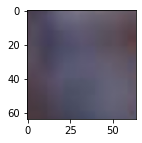

In [15]:
plt.figure(figsize=(15,2))

plt.imshow(x_train[500])

<h1><b>now below is the model creation part<b>

In [16]:
from sklearn.metrics import confusion_matrix,classification_report

In [17]:
from tensorflow.keras import models,layers

In [18]:
def create_model():
    cnn = models.Sequential([
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(15, activation='softmax')
    ])
    
    
#     compiling the data
    cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return cnn

In [19]:
cnn = create_model()

<h3> fiiting model with training data

In [20]:
cnn.fit(x_train, y_train, epochs=40)


Epoch 1/40
25/25 [==============================] - 4s 169ms/step - loss: 2.6853 - accuracy: 0.0792
Epoch 2/40
25/25 [==============================] - 4s 174ms/step - loss: 2.6334 - accuracy: 0.1034
Epoch 3/40
25/25 [==============================] - 5s 185ms/step - loss: 2.5160 - accuracy: 0.1750
Epoch 4/40
25/25 [==============================] - 4s 178ms/step - loss: 2.3353 - accuracy: 0.2733
Epoch 5/40
25/25 [==============================] - 4s 176ms/step - loss: 2.1091 - accuracy: 0.3461
Epoch 6/40
25/25 [==============================] - 4s 162ms/step - loss: 1.8327 - accuracy: 0.4355
Epoch 7/40
25/25 [==============================] - 4s 168ms/step - loss: 1.5909 - accuracy: 0.5019
Epoch 8/40
25/25 [==============================] - 4s 176ms/step - loss: 1.3303 - accuracy: 0.6220
Epoch 9/40
25/25 [==============================] - 4s 179ms/step - loss: 1.1592 - accuracy: 0.6526
Epoch 10/40
25/25 [==============================] - 4s 179ms/step - loss: 1.0325 - accuracy: 0.6845

<h3>saving the model and evaluating the model 

In [ ]:
cnn.save('model1.h5')

In [21]:
cnn.evaluate(x_test,y_test)

3/3 [==============================] - 0s 51ms/step - loss: 0.0151 - accuracy: 1.0000


[0.015119979158043861, 1.0]

In [22]:
y_pred = cnn.predict(x_test)
y_pred= [np.argmax(element) for element in y_pred]

In [23]:
confusion_matrix(y_test,y_pred)


array([[9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5]])

<h1>level 1
<h2> Using model to predict who's that cricketer from the image saved on computer

In [24]:
os.chdir('/home/aimulizer/Desktop/linkedin challenge/')

In [25]:
import tensorflow as tf
cnn = tf.keras.models.load_model('model.h5')

In [26]:
import cv2

In [27]:
# loading image
image = cv2.imread('virat_kohli.jpg')

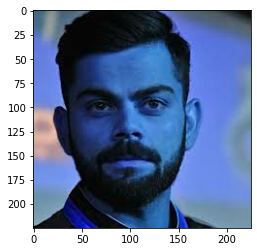

In [28]:
plt.imshow(image)

In [29]:
# preprocessing the image to maike it suitable for the model

face = frontal_face_classifier.detectMultiScale(image,1.05,3)

In [30]:
x,y,w,h = face[0]

In [31]:
data=[]
for x,y,w,h in face:
    new_img = cv2.resize(image[y:y+h,x:x+w],(image_size,image_size))
    data.append(new_img)

In [32]:
import numpy as np
data = np.asarray(data)

In [33]:
data = np.asarray(data)

In [34]:
data.shape

(1, 64, 64, 3)

In [35]:
ypred = cnn.predict(data)

In [36]:
ypred

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [37]:
i = [np.argmax(x) for x in ypred]

In [38]:
i

[8]

In [39]:
labels[i[0]]

'virat_kohli'

Text(0.5, 0, 'virat_kohli')

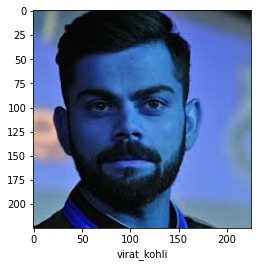

In [40]:
#identifying the cricketer
plt.imshow(image)
plt.xlabel(labels[i[0]])

In [41]:
face.reshape(4,)

array([ 23,  38, 149, 149], dtype=int32)

In [42]:
y

38

In [43]:
image = cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,255),1)

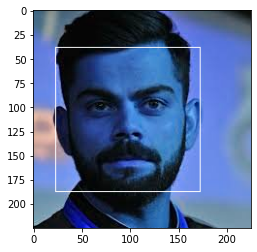

In [44]:
plt.imshow(image)

In [46]:
while True:
    cv2.imshow('legend',image)
    if cv2.waitKey(2) & 0xff ==27:
        break

cv2.destroyAllWindows()

In [45]:
font = cv2.FONT_HERSHEY_SIMPLEX
image = cv2.putText(image,labels[i[0]],(x-3,y-3),font,1,(255,255,255),2)

In [ ]:
cv2.imwrite('test_from_computer1.jpg',image)

<h1> level 2
    
<h2> using webcam to get the image and tell who's that cricketer 

In [47]:
def webcam():
    vid = cv2.VideoCapture(0)
    
    while(True):

        # Capture the video frame
        # by frame
        ret, frame = vid.read()
        
        face = frontal_face_classifier.detectMultiScale(frame,1.05,3)
        for x,y,w,h in face:
            new_img = cv2.resize(frame[y:y+h,x:x+w],(image_size,image_size))
            new_img = new_img.reshape(1,64,64,3)
            ypred = cnn.predict(new_img)
            ypred = [np.argmax(x) for x in ypred]
            frame = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,255),1)
            frame = cv2.puText(frame,labels[ypred[0]],(x-3,y-3),font,1,(255,255,255),2)
            
            

        # Display the resulting frame
        cv2.imshow('frame', frame)

        if cv2.waitKey(1) & 0xFF == 27:
            break

    # After the loop release the cap object
    vid.release()
    # Destroy all the windows
    cv2.destroyAllWindows()

In [ ]:
webcam()

In [ ]:
vid = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
  
    # Display the resulting frame
    cv2.imshow('frame', frame)
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()